# Matriz de confusión

<center><div> <img src="fig/matrix.png" alt="Drawing" style="width: 600px;"/></div><center>

https://rapidminer.com/glossary/confusion-matrix/

* La clase final se determinará utilizando esta probabilidad y un umbral de decisión, este umbral puede ser ajustado para modificar el comportamiento de nuestro modelo para un problema específico.

* Los dos tipos errores de predicción son:

1. **Falso Positivo**: Predecir un evento cuando no hubo evento
2. **Falso Negativo**: Predecir que no hubo un evento cuando sí que hubo evento

El balanceo entre estos dos errores es lo que nos otorgará el nivel de umbral óptimo.

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', size = 15);

# Curva ROC Receiver Operating Characteristic (Característica Operativa del Receptor).

Para interpretar correctamente las predicciones realizadas por modelos de clasificación binarios utilizaremos las curvas ROC y las curvas de precisión-sensibilidad (Precision-Recall).

La **curva ROC** es una gráfica de la razón de falsos positivos (eje x) y de la razón de falsos negativos (eje y) dado un umbral, es decir, nos da la "falsa alarma" vs la tasa de éxito.

La tasa de verdaderos positivos se calcula como el número de positivos verdaderos divididos entre el número de positivos verdaderos y de falsos negativos, es decir, la **sensibilidad** de nuestro modelo para prediciendo las clases positivas cuando la salida real es positiva. 

La tasa de falsos positivos se calcula como el número de falsos positivos dividido entre la suma de falsos positivos con los verdaderos negativos. Se considera como la tasa de "falsa alarma", es decir, que una clase negativa sea determinada por el modelo como positiva.

La **especificidad** es la inversa de la tasa de falsos positivos. Se obtiene dividiendo el número total de verdaderos negativos entre la suma de los verdaderos negativos y los falsos positivos. 

La curva ROC permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador y el área debajo de la curva (AUC) es el resumen de la calidad del modelo.

* Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
* Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


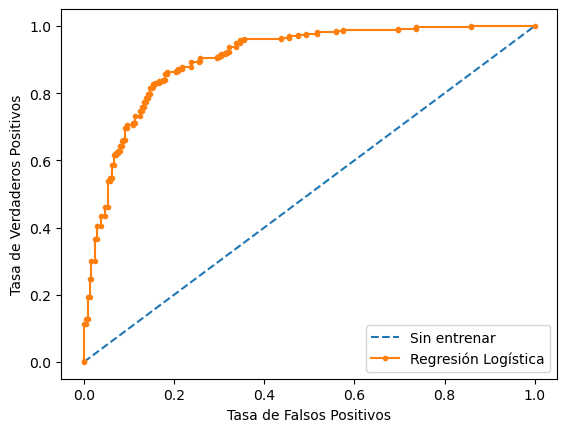

In [1]:
from sklearn.datasets import make_classification #
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# Generamos un dataset de dos clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

¿Qué es la curva de precisión-sensibilidad?
Existen numerosas maneras de evaluar el rendimiento de un modelo de predicción. Una bastante frecuente y sobre la que hablaremos más en detalle, se centra en la precisión y la sensibilidad como métricas fundamentales. 

La precisión se calcula como el número de verdaderos positivos entre la suma de verdaderos positivos y de falsos positivos. Describe cómo de bueno es el modelo a la hora de predecir las salidas de la clase positiva. Otra forma de llamar a la precisión también se le llama poder predictivo positivo.

Vuelve a aparecer la sensibilidad (recall), que ya ha sido comentada en apartados anteriores. Verdaderos positivos divididos entre la suma de verdaderos positivos y de falsos positivos.

Como resumen, la curva de precisión-sensibilidad enfrenta la precisión (eje y) con la sensibilidad (eje x) para diferentes umbrales.

n la imagen posterior se muestra dicha curva para una serie de modelos, cada uno con un poder predictivo distinto. El modelo (morado) en la esquina representaría a un clasificador perfecto. Las curvas más alejadas de esa esquina representarían a modelos peores. Un modelo aleatorio sin entrenar estaría representado como una línea horizontal a media altura (0.5).

https://arxiv.org/pdf/1905.05441.pdf

¿Por qué es útil la curva de precisión-sensibilidad?
Prestar atención a la curva de precisión-sensibilidad es especialmente útil en aquellos casos en los que tenemos clases desbalanceadas. Suele ser bastante común que haya muchos registros negativos (clase 0) y muy pocos positivos (clase 1).

Apenas nos interesará el rendimiento del modelo en la clase mayoritaria (clase 0) por lo que no le prestaremos demasiada atención a los verdaderos negativos. La clave del uso de la curva de precisión-sensibilidad es que no tiene en cuenta los falsos negativos. La curva de precisión-sensibilidad solo se preocupa de la clase positiva, es decir, de la clase minoritaria.

A la hora de resumir el rendimiento del modelo en un valor numérico, en este caso se utilizan dos valores:

Valor F (F-Score): Calcula la media armónica de la precisión y la sensibilidad. (Se utiliza la media armónica porque ambos valores son tasas)
Área bajo la curva: AUC. Al igual que en la curva ROC, el valor del área bajo la curva nos permite también determinar el rendimiento del modelo
En términos de elección del modelo, el valor F resume la habilidad del modelo para un valor específico del umbral. Como comparativa, el AUC contempla la habilidad del modelo a lo largo de los diversos umbrales.

Esto convierte a la curva precisión-sensibilidad en la manera más óptima de medir el rendimiento de modelos de clasificación binaria cuyas clases no estén balanceadas

Utilizaremos la función precision_recall_curve() que toma como parámetros las salidas reales y las probabilidades obtenidas para la case positiva. Esta función devuelve vectores de precisión, sensibilidad y los umbrales para dichos valores.

La función f1_score() toma como parámetros los valores de salida reales y los valores de las clases obtenidas devolviendo el valor F. Recordemos que el valor F se calcula para un umbral determinado por lo que se usa la predicción de clases, no las probabilidades.

La función auc() de nuevo toma como entradas la sensibilidad y la precisión devolviendo el valor del área bajo la curva.